In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'malgun.ttf').get_name()
rc('font', family = font_name)

# 원본 데이터 확인#

In [3]:
df = pd.read_csv('AFSNT.csv', encoding = 'cp949')                    

In [4]:
df.head()

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,N,10:05,10:32,N,NaN,N,NaN
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,NaN,N,NaN
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,NaN,N,NaN
3,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,N,13:25,14:09,Y,C02,N,NaN
4,2017,1,1,일,ARP3,ARP6,J,J1958,SEw3NzE4,A,N,16:10,16:31,N,NaN,N,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987709 entries, 0 to 987708
Data columns (total 17 columns):
SDT_YY    987709 non-null int64
SDT_MM    987709 non-null int64
SDT_DD    987709 non-null int64
SDT_DY    987709 non-null object
ARP       987709 non-null object
ODP       987709 non-null object
FLO       987709 non-null object
FLT       987709 non-null object
REG       979446 non-null object
AOD       987709 non-null object
IRR       987709 non-null object
STT       987709 non-null object
ATT       987709 non-null object
DLY       987709 non-null object
DRR       118937 non-null object
CNL       987709 non-null object
CNR       8259 non-null object
dtypes: int64(3), object(14)
memory usage: 128.1+ MB


In [6]:
df.describe(include = 'all')

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
count,987709.000000,987709.000000,987709.000000,987709,987709,987709,987709,987709,979446,987709,987709,987709,987709,987709,118937,987709,8259
unique,NaN,NaN,NaN,7,15,15,12,1541,363,2,2,372,1159,2,36,2,23
top,NaN,NaN,NaN,일,ARP3,ARP3,J,L1804,SEw3NTk0,A,N,8:00,0:00,N,C02,N,A04
freq,NaN,NaN,NaN,143873,393607,393429,276447,1832,15120,493992,966084,10662,8259,868772,107738,979450,1833
mean,2017.794231,5.956420,15.705550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.746196,3.366872,8.788141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2017.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2017.000000,3.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2018.000000,6.000000,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2018.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

SDT_YY         0
SDT_MM         0
SDT_DD         0
SDT_DY         0
ARP            0
ODP            0
FLO            0
FLT            0
REG         8263
AOD            0
IRR            0
STT            0
ATT            0
DLY            0
DRR       868772
CNL            0
CNR       979450
dtype: int64

# 지연예측에 불필요한 데이터, 이상데이터 제거

In [8]:
#부정기편 확인
df['IRR'].unique()

array(['N', 'Y'], dtype=object)

In [9]:
#부정기편 지우기(부정기편 = N인 행들만 남기고 IRR컬럼 지우기)
df = df[df['IRR'] == 'N']
df.drop(['IRR'], axis = 1, inplace = True)

In [10]:
#결항 확인
df['CNL'].unique()

array(['N', 'Y'], dtype=object)

In [11]:
#결항 데이터 지우기(결항 = N인 행들만 남기고 CNL,CNR 컬럼 지우기)
df = df[df['CNL'] == 'N']
df.drop(['CNL','CNR'], axis = 1, inplace = True)

In [12]:
#REG(항공기 번호 nan값 확인후 행 삭제)
df['REG'].fillna('NULL', inplace = True)
df = df[df['REG'] != 'NULL']

In [13]:
#계획출발시간 및 실제 출발 시간 (int)도출
df['STT_HOUR'] = df['STT'].str[0:2]
df['STT_HOUR'] = df['STT_HOUR'].str.replace(':','')
df['STT_HOUR'] = df['STT_HOUR'].astype(int)
df['ATT_HOUR'] = df['ATT'].str[0:2]
df['ATT_HOUR'] = df['ATT_HOUR'].str.replace(':','')
df['ATT_HOUR'] = df['ATT_HOUR'].astype(int)
#실제 출발시간과 예정출발시간 차이 구한후 시간차 확인
df['GAP_HOUR'] = df['ATT_HOUR'] - df['STT_HOUR']
df['GAP_HOUR'].value_counts()

 0     727358
 1     179520
-1      40565
 2       7898
 3       1898
 4        589
 5        187
 6         68
-2         14
 7         14
-9         11
 8          4
-12         3
-15         3
-20         3
-21         3
 11         3
-3          2
 10         1
 9          1
-10         1
-22         1
-18         1
-13         1
-23         1
Name: GAP_HOUR, dtype: int64

In [14]:
#7시간 이상 지연된 경우는 소수데이터이므로 과적합의 원인이 될 수 있으므로 행 삭제
df = df[df['GAP_HOUR'] < 7]
#10분이상 조기출발은 페리호(불필요데이터)이므로 -2이하 행 삭제
df = df[df['GAP_HOUR'] > -2]

In [15]:
df['GAP_HOUR'].value_counts()

 0    727358
 1    179520
-1     40565
 2      7898
 3      1898
 4       589
 5       187
 6        68
Name: GAP_HOUR, dtype: int64

In [16]:
#시간차가 -1 인경우 10분조기출발일 경우는 정상 조기출발이므로 남겨야 한다.
df['STT_MINUTE'] = df['STT'].str[-2:]
df['STT_MINUTE'] = df['STT_MINUTE'].astype(int)
df['ATT_MINUTE'] = df['ATT'].str[-2:]
df['ATT_MINUTE'] = df['ATT_MINUTE'].astype(int)
#실제 출발시간과 예정출발시간 차이 구한후 시간차가 -1인것 중 10분이상조기출발 삭제
df['GAP_MINUTE'] = df['ATT_MINUTE'] - df['STT_MINUTE']
df_tem1 = df[df['GAP_HOUR'] != -1] #시차가 -1이 아닌것(살릴것)
df_tem2 = df[df['GAP_HOUR'] == -1] #시차가 -1인것 (검사할것)
df_tem2_tem = df_tem2[df_tem2['GAP_MINUTE'] >= 50] #시차가 -1인것중 10분내의 조기출발인것만 살리기
df = pd.concat([df_tem1,df_tem2_tem]) #살릴데이터 합치기

In [17]:
#예측에 필요한 STT_HOUR를 제외한 컬럼 제거
df.drop(['ATT_HOUR','GAP_HOUR','STT_MINUTE','ATT_MINUTE','GAP_MINUTE'],axis = 1,inplace = True)

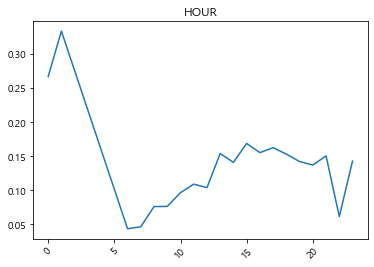

In [18]:
#출발시간에 따른 지연율 확인(소수의 심야시간의 압도적으로 높은 지연율) - 과적합 피하기 위해 삭제
df_Y = df[df['DLY'] == 'Y']
YES = df_Y.groupby('STT_HOUR').count()
counts = pd.value_counts(df['STT_HOUR'].values, sort = False)
per = YES['SDT_YY']/counts
df_per = pd.DataFrame(data = per, columns = ['per'])

fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.title('HOUR')
ax.plot(df_per['per'])


for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)

In [19]:
#23시 0시 1시의 소수 데이터 삭제
df['STT_HOUR'].value_counts()

9     68074
19    67898
17    67288
18    67020
16    65002
14    62881
15    62823
11    62696
10    62122
8     61186
13    58253
20    58117
12    57329
7     46689
21    38041
6     18655
22    16192
0        15
23        7
1         3
Name: STT_HOUR, dtype: int64

In [20]:
df = df[df['STT_HOUR'] != 0]
df = df[df['STT_HOUR'] != 1]
df = df[df['STT_HOUR'] != 23]

In [21]:
#FLT 끝이 F 이면 회항 및 대체편 이므로 제거
df['-1'] = df['FLT'].str[-1]

In [22]:
df = df[df['-1'] !='F']
del df['-1']

# ARP1 ~ ARP15 해당 국내공항 찾기

In [23]:
#아래의 표와 링크(한국 공항 공사 항공 동계 페이지) 
#http://www.airport.co.kr/www/extra/stats/domesticLineStats/layOut.do?cid=2015102917520018116&menuId=403 
#를 비교하여 해당 공항 확인
B = df[df['AOD']=='D']
C = B.loc[:,['ARP','ODP']]
C['number']=1 
C.pivot_table(index = 'ARP', columns = 'ODP', aggfunc = np.sum, margins = True)
#공항 매칭 (ARP1:김포,ARP2:김해,ARP3:제주,ARP4:대구,ARP5:울산,ARP6:청주,ARP7:무안,
#ARP8:광주,ARP9:여수,ARP10:양양,ARP11:포항,ARP12:사천,ARP13:군산,ARP14:원주,ARP15:인천)

number                                                            \
ODP        ARP1   ARP11   ARP12   ARP13  ARP14   ARP15     ARP2      ARP3   
ARP                                                                         
ARP1        NaN  1707.0  1768.0     NaN    NaN     NaN  25040.0  109424.0   
ARP11    1703.0     NaN     NaN     NaN    NaN     NaN      NaN       NaN   
ARP12    1766.0     NaN     NaN     NaN    NaN     NaN      NaN     602.0   
ARP13       NaN     NaN     NaN     NaN    NaN     NaN      NaN    2049.0   
ARP14       NaN     NaN     NaN     NaN    NaN     NaN      NaN     910.0   
ARP15       NaN     NaN     NaN     NaN    NaN     NaN   4909.0       NaN   
ARP2    25955.0     NaN     NaN     NaN    NaN  4907.0      NaN   28158.0   
ARP3   108180.0     NaN   603.0  2052.0  910.0     NaN  29070.0       NaN   
ARP4      396.0     NaN     NaN     NaN    NaN  1745.0      NaN   13916.0   
ARP5     6010.0     NaN     NaN     NaN    NaN     NaN      NaN    1608.0   
ARP6        NaN     NaN     NaN     NaN    NaN     NaN      NaN   16706.0   
ARP7        NaN     NaN     NaN     NaN    NaN     NaN      NaN    1508.0   
ARP8     1907.0     NaN     NaN     NaN    NaN     NaN      NaN   14471.0   
ARP9     3733.0     NaN     NaN     NaN    NaN     NaN      NaN    2514.0   
All    149650.0  1707.0  2371.0  2052.0  910.0  6652.0  59019.0  191866.0   

                                                                  
ODP       ARP4    ARP5     ARP6    ARP7     ARP8    ARP9     All  
ARP                                                               
ARP1     392.0  6013.0      NaN     NaN   1911.0  3733.0  149988  
ARP11      NaN     NaN      NaN     NaN      NaN     NaN    1703  
ARP12      NaN     NaN      NaN     NaN      NaN     NaN    2368  
ARP13      NaN     NaN      NaN     NaN      NaN     NaN    2049  
ARP14      NaN     NaN      NaN     NaN      NaN     NaN     910  
ARP15   1750.0     NaN      NaN     NaN      NaN     NaN    6659  
ARP2       NaN     NaN      NaN     NaN      NaN     NaN   59020  
ARP3   13933.0  1708.0  16692.0  1504.0  14495.0  2515.0  191662  
ARP4       NaN     NaN      NaN     NaN      NaN     NaN   16057  
ARP5       NaN     NaN      NaN     NaN      NaN     NaN    7618  
ARP6       NaN     NaN      NaN     NaN      NaN     NaN   16706  
ARP7       NaN     NaN      NaN     NaN      NaN     NaN    1508  
ARP8       NaN     NaN      NaN     NaN      NaN     NaN   16378  
ARP9       NaN     NaN      NaN     NaN      NaN     NaN    6247  
All    16075.0  7721.0  16692.0  1504.0  16406.0  6248.0  478873

In [24]:
#AOD(출발,도착)분류하여 출발-도착(ADP) 항로컬럼 묶기
df_D = df[df['AOD'] == 'D']
df_A = df[df['AOD'] == 'A']
df_D['ADP'] = df_D['ARP'] + '-' + df_D['ODP']
df_A['ADP'] = df_A['ODP'] + '-' + df_A['ARP']
df = pd.concat([df_D,df_A])

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [25]:
df = df.reset_index()
del df['index']

In [26]:
#구글을 통해 항로별(ADP) 항로거리 검색 후 데이터 프레임 생성
ADP = ['ARP15-ARP2','ARP15-ARP3','ARP15-ARP4','ARP15-ARP10','ARP15-ARP9','ARP1-ARP3',
      'ARP1-ARP4','ARP1-ARP6','ARP1-ARP8','ARP1-ARP10','ARP1-ARP5','ARP1-ARP12','ARP1-ARP11','ARP1-ARP9','ARP1-ARP14',
      'ARP2-ARP4','ARP2-ARP6','ARP2-ARP10','ARP3-ARP4','ARP3-ARP2','ARP3-ARP6','ARP3-ARP8','ARP3-ARP7','ARP3-ARP10'
      ,'ARP3-ARP5','ARP3-ARP12','ARP3-ARP11','ARP3-ARP13','ARP3-ARP9','ARP3-ARP14','ARP6-ARP15','ARP6-ARP1','ARP6-ARP1','ARP6-ARP9','ARP7-ARP15','ARP10-ARP8','ARP9-ARP6',
      'ARP4-ARP3', 'ARP8-ARP3', 'ARP14-ARP3', 'ARP12-ARP3', 'ARP6-ARP3',
       'ARP5-ARP3', 'ARP9-ARP3', 'ARP13-ARP3', 'ARP2-ARP3', 'ARP2-ARP1',
       'ARP3-ARP1', 'ARP12-ARP1', 'ARP9-ARP1', 'ARP11-ARP1', 'ARP5-ARP1',
       'ARP2-ARP15', 'ARP4-ARP15', 'ARP1-ARP2', 'ARP8-ARP1', 'ARP7-ARP3',
       'ARP4-ARP1','ARP10-ARP2','ARP10-ARP3']
DIS = [338,438,264,208,309,449,249,113,270,174,317,298,293,311,106,82,214,320,330,291,367,182,164,542,349,227,383,266,180,456,126,113,214,208,275,8365,208,991,183,456,227,368,349,181,266,291,327,452,298,328,293,327,315,244,329,273,165,256,317,542]
ADP_DIS = pd.DataFrame(columns = {'ADP','DIS'})
ADP_DIS['DIS'] = DIS
ADP_DIS['ADP'] = ADP
ADP_DIS.head()

,DIS,ADP
0,338,ARP15-ARP2
1,438,ARP15-ARP3
2,264,ARP15-ARP4
3,208,ARP15-ARP10
4,309,ARP15-ARP9


In [27]:
#데이터와 거리 합치기
df = df.merge(ADP_DIS,how = 'left', on = ['ADP'])

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


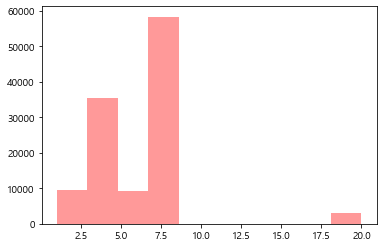

In [28]:
#거리(카테고리화)와 지연 횟수 확인(거리에 따라 지연율의 확연한 차이 발견)
bins = np.linspace(df.DIS.min(), df.DIS.max(), 20)
df['DIS_bin'] = np.digitize(df['DIS'], bins)
df1 = df[df['DLY']=='Y']

df1['sex'] = 1

plt.figure
plt.hist(df1['DIS_bin'], bins=10, facecolor = 'red', alpha=0.4, histtype = 'stepfilled')
plt.show()
del df['DIS_bin'] #생성된 카테고리 컬럼 지우기

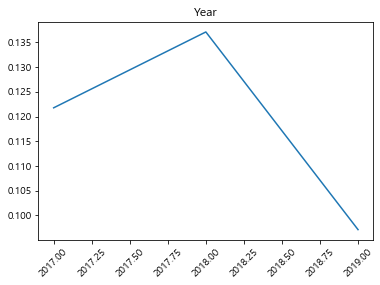

In [29]:
#연도별 지연횟수 확인(2019년의 경우 운행이 아직 끝나지 않아 정확한 파악 불가 따라서 SDT_YY제거)
df_Y = df[df['DLY'] == 'Y']
YES = df_Y.groupby('SDT_YY').count()
counts = pd.value_counts(df['SDT_YY'].values, sort = False)
per = YES['SDT_MM']/counts
df_per = pd.DataFrame(data = per, columns = ['per'])

fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.title('Year')
ax.plot(df_per['per'])


for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)

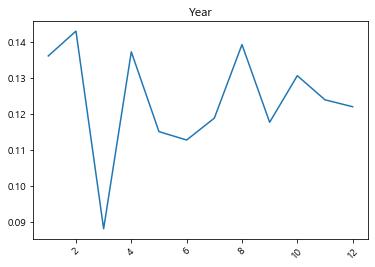

In [30]:
#월별 지연율 확인결과 확연한 차이 발견(독립변수 사용)
df_Y = df[df['DLY'] == 'Y']
YES = df_Y.groupby('SDT_MM').count()
counts = pd.value_counts(df['SDT_MM'].values, sort = False)
per = YES['SDT_YY']/counts
df_per = pd.DataFrame(data = per, columns = ['per'])

fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.title('Year')
ax.plot(df_per['per'])


for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)

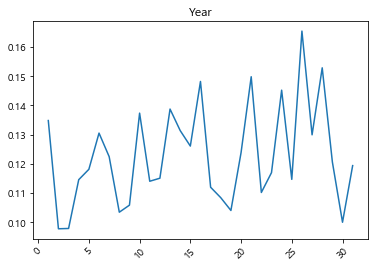

In [31]:
#일별 지연율 확인결과 확연한 차이 발견(독립변수 사용)
df_Y = df[df['DLY'] == 'Y']
YES = df_Y.groupby('SDT_DD').count()
counts = pd.value_counts(df['SDT_DD'].values, sort = False)
per = YES['SDT_YY']/counts
df_per = pd.DataFrame(data = per, columns = ['per'])

fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.title('Year')
ax.plot(df_per['per'])


for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)

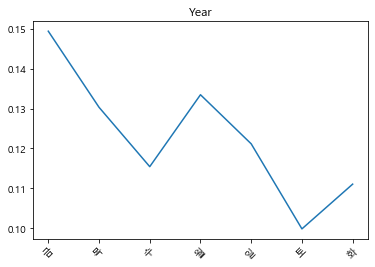

In [32]:
#요일별 지연율 확인결과 확연한 차이 발견(독립변수 사용)
df_Y = df[df['DLY'] == 'Y']
YES = df_Y.groupby('SDT_DY').count()
counts = pd.value_counts(df['SDT_DY'].values, sort = False)
per = YES['SDT_YY']/counts
df_per = pd.DataFrame(data = per, columns = ['per'])

fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.title('Year')
ax.plot(df_per['per'])


for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)

# 데이터 샘플링

In [33]:
#DLY데이터 편중 확인 및 샘플링
print(df['DLY'].value_counts())
df_Y = df[df['DLY'] == 'Y']
df_N = df[df['DLY'] == 'N']
df_N_sample = df_N.sample(frac = (len(df_Y)/len(df_N)) * (6/4)) #N과 Y 6대4샘플링
df = pd.concat([df_N_sample,df_Y])

N    824576
Y    115687
Name: DLY, dtype: int64


In [34]:
print(df['DLY'].value_counts())
df = df.reset_index()
del df['index']

N    173530
Y    115687
Name: DLY, dtype: int64


# 불필요 컬럼 제거

In [35]:
df.drop(['SDT_YY','REG','STT','ATT','DRR','ADP'],axis = 1, inplace = True)

In [36]:
df.head()

,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,AOD,DLY,STT_HOUR,DIS
0,9,23,토,ARP8,ARP3,J,J1905,A,N,9,182
1,4,26,수,ARP15,ARP2,A,A1531,D,N,21,338
2,2,15,목,ARP1,ARP3,I,I1316,A,N,15,452
3,9,12,화,ARP1,ARP3,F,F1251,D,N,6,449
4,3,12,일,ARP2,ARP1,B,B1812,D,N,13,327


# 데이터 type 변환

In [37]:
df_model = df.copy()
from sklearn.preprocessing import LabelEncoder
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])

# 모델(lightGBM) 생성 및 평가

In [38]:
#테스트_트레인 셑 설정
X = df_model.drop(['DLY'],1)
y = df_model['DLY']
predictions = np.zeros(len(y))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [39]:
#모델 생성 및 학습
import lightgbm as lgb
Lgb = lgb.LGBMClassifier(n_estimators=1300, 
                         silent=True, 
                         random_state =10, 
                         max_depth=15,
                         num_leaves=500,
                         learning_rate = 0.1,
                         objective='binary',
                         metrics ='auc')
model = Lgb.fit(X_train, y_train)

In [40]:
#test를 통한 모델 검증
predictions = model.predict(X_test)
proba = model.predict_proba(X_test)
from sklearn.metrics import accuracy_score, roc_auc_score
score = roc_auc_score(y_test, predictions)
score2 = accuracy_score(y_test, predictions)
print('roc_auc_score:',score)
print('accuracy_score:',score2)

roc_auc_score: 0.7527141808399812
accuracy_score: 0.7672705898623885


# 데이터 예측하기

In [41]:
df.head()

,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,AOD,DLY,STT_HOUR,DIS
0,9,23,토,ARP8,ARP3,J,J1905,A,N,9,182
1,4,26,수,ARP15,ARP2,A,A1531,D,N,21,338
2,2,15,목,ARP1,ARP3,I,I1316,A,N,15,452
3,9,12,화,ARP1,ARP3,F,F1251,D,N,6,449
4,3,12,일,ARP2,ARP1,B,B1812,D,N,13,327


In [42]:
#컬럼 맞추기
df_predict = pd.read_csv('AFSNT_DLY.csv', encoding = 'cp949')

In [43]:
#오타수정
df_predict.iloc[2,4] = 'ARP1'

In [44]:
df_DN = df_predict[df_predict['AOD'] == 'D']

df_DN['ADP'] = df_DN['ARP']+'-'+df_DN['ODP']

df_D_DN = df_DN.merge(ADP_DIS,how = 'left', on = ['ADP'])


df_AN = df_predict[df_predict['AOD'] == 'A']

df_AN['ADP'] = df_AN['ODP']+'-'+df_AN['ARP']

df_A_AN = df_AN.merge(ADP_DIS,how = 'left',on = ['ADP'])

dfN = pd.concat([df_D_DN,df_A_AN])

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [45]:
dfN['STT_HOUR'] = dfN['STT'].str[0:2]
dfN['STT_HOUR'] = dfN['STT_HOUR'].str.replace(':','')
dfN['STT_HOUR'] = dfN['STT_HOUR'].astype(int)
dfN.drop(['SDT_YY','STT','DLY_RATE','ADP'],1,inplace = True)
dfN = dfN.reset_index()
del dfN['index']

In [46]:
df_final = pd.concat([df,dfN])
df_final['DLY'].fillna('Y',inplace = True)
df_final = df_final.reset_index()
del df_final['index']

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [47]:
from sklearn.preprocessing import LabelEncoder
for col in df_final.columns:
    if df_final[col].dtype == 'object':
        le = LabelEncoder()
        df_final[col] = le.fit_transform(df_final[col])

predictions = np.zeros(len(y))

import lightgbm as lgb
Lgb = lgb.LGBMClassifier(n_estimators=1300, 
                         silent=True, 
                         random_state =10, 
                         max_depth=15,
                         num_leaves=500,
                         learning_rate = 0.1,
                         num_iterations = 1000,
                         objective='binary',
                         metrics ='auc')


model = Lgb.fit(df_final.drop(['DLY'],1).iloc[:len(df)], df_final['DLY'].iloc[:len(df)])
predictions = model.predict(df_final.drop(['DLY'],1).iloc[len(df):])
proba = model.predict_proba(df_final.drop(['DLY'],1).iloc[len(df):])



c:\anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [48]:
len(predictions)

16076

In [49]:
len(proba)

16076

# 예측파일 원본 에 저장

In [100]:
list_predict = predictions.astype(list)
df_proba = pd.DataFrame(proba)

In [101]:
df_proba.head()

,0,1
0,0.811417,0.188583
1,0.127007,0.872993
2,0.607220,0.392780
3,0.925170,0.074830
4,0.972635,0.027365


In [102]:
df_predict_output = pd.read_csv('AFSNT_DLY.csv',encoding = 'cp949')

In [103]:
df_predict_output['DLY'] = list_predict
df_predict_output['DLY_RATE'] = df_proba.iloc[:,1]

In [105]:
#제출형식맞추기
df_predict_output['DLY']=df_predict_output['DLY'].astype(str)
df_predict_output['DLY']=df_predict_output['DLY'].str.replace('0','N')
df_predict_output['DLY']=df_predict_output['DLY'].str.replace('1','Y')
df_predict_output['DLY_RATE'] = df_predict_output.round({'DLY_RATE':3})['DLY_RATE']


In [114]:
#결과값 저장
df_predict_output.to_csv('AFSNT_DLY_predict.csv',encoding = 'cp949')